# Modelleren van de levensloop van een kever met de Lesliematrix

In de vorige hoofdstukken concentreerden we ons op het aantal rupsen van de buxusmot doorheen de tijd, waarbij we een rups als een onveranderende entiteit beschouwden. In dit hoofdstuk zullen we ook rekening houden met de levensfase en -vorm waarin een insect zich kan bevinden. Daarvoor zullen we de kever beschouwen, die drie verschillende levensfases doorloopt:

- De kever komt ter wereld in de vorm van een eitje
- Uit het eitje komt een larve gekropen
- De larve ontpopt zich tot een kever

Voor een bioloog is het interessant om te weten hoeveel eitjes, larven en kevers er op verschillende momenten in de tijd zijn. In dit hoofdstuk zal je leren dat deze populatiegroottes gemodelleerd kunnen worden met behulp van de **Lesliematrix**.

De overgang van één fase naar een andere is niet meteen evident te noemen. Zo werd er empirisch vastgesteld dat maar liefst 95% van de eitjes opgegeten wordt of nooit uitkomt. Wanneer er initieel 1000 eitjes zijn, blijven er na een maand dus slechts ongeveer 50 over. De kans om vervolgens van een larve naar een kever te gaan is een stuk groter: maar liefst 75%. Eens ontpopt tot een kever, legt deze in een maand tijd ongeveer 100 eitjes.

Je kunt al deze informatie nu in een graaf gieten, die de toestand op een zeker moment in de tijd bevat:

![Graaf](files/graph.png "Graaf")

Op basis van de waarden van de knopen in de graaf, kan de volgende toestand berekend worden. Om dit proces te vereenvoudigen, zal je matrices gebruiken.

## De Lesliematrix

Om aan matrixvermenigvuldiging te kunnen doen, stel je de toestand op tijdstip $0$ gelijk aan de vector $v_0 = \begin{bmatrix} 1000 \\ 100 \\ 60 \end{bmatrix}$, die het aantal eitjes, levers en kevers bevat. Om dan de toestand $v_{1}$ op tijdstip $1$ te bepalen, gebruiken we de **Lesliematrix** $L$ die de populatiegroei beschrijft. In bovenstaand voorbeeld ziet deze er als volgt uit:

$$L = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix}$$

Vertrekken we van de toestand $v_0$, dan kan $v_{1}$ berekend worden als volgt:

$$v_{1} = L v_0 = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix} \begin{bmatrix} 1000 \\ 100 \\ 60 \end{bmatrix} = \begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix}$$

Gaan we een stap verder, dan vinden we:

$$v_{2} = L v_{1} = \begin{bmatrix} 0 & 0 & 100 \\ 0.05 & 0 & 0 \\ 0 & 0.75 & 0 \end{bmatrix} \begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix} = \begin{bmatrix} 7500 \\ 300 \\ 37.5 \end{bmatrix}$$

Bemerk dat deze laatste uitdrukking ook als volgt geschreven kan worden:

$$v_{2} = L v_{1} = L L v_{0} = L^2 v_{0}$$

Om het aantal eitjes, larven en kevers in tijdstap $t$ te berekenen, volstaat het om de $n$de macht van de matrix $L$ te berekenen, en deze te vermenigvuldigen met $v_0$:

$$v_{t} = L^t v_{0}$$

Hieronder zullen we Python gebruiken om aan matrixvermenigvuldiging te doen.

## Matrixvermenigvuldiging in Python

In Python kan je de `Numpy` module gebruiken, die toelaat om met vectoren en matrices te werken. Een rijmatrix (of vector) V kan als volgt gedefinieerd worden:

In [1]:
# importeer de nodige bibliotheken
import numpy as np


v = np.array([1, 2, 3])
print(v)

[1 2 3]


Een matrix $M$ kan als volgt gedefinieerd worden:

In [2]:
M = np.array([[10, 32, 67], [46, 71, 14], [19, 23, 31]])
print(M)

[[10 32 67]
 [46 71 14]
 [19 23 31]]


Beschouw een tweede matrix $N$:

In [3]:
N = np.array([[50, 30, 60], [10, 80, 60], [20, 15, 30]])
print(N)

[[50 30 60]
 [10 80 60]
 [20 15 30]]


### Opdracht 1

Reken alle elementen van de eerste rij van het product $M$ met $N$ met de hand uit. Welke waarden bekom je?

[2160, 3865, 4530]

In Python kan je deze twee matrices als volgt vermenigvuldigen:

In [4]:
L = M @ N
print(L)

[[2160 3865 4530]
 [3290 7270 7440]
 [1800 2875 3450]]


> **warning**
> Gelet op het feit dat $v$ een rijmatrix is, is het wiskundig gezien niet mogelijk om $v$ links te vermenigvuldigen met $L$. Met de `NumPy` module gaat dit echter wel:

In [5]:
X = L @ v
print(X)

[23480 40150 17900]


Hoewel programmeurs dit extra werk typisch zullen vermijden, is het ook correct om $v$ te definiëren als een kolommatrix. In dat geval vind je:

In [6]:
v = np.array([[1], [2], [3]])
print(v)

[[1]
 [2]
 [3]]


In [7]:
X = L @ v
print(X)

[[23480]
 [40150]
 [17900]]


## Terug naar de insecten

Gewapend met bovenstaande kennis, kan je de vector $v_0$ en de Lesliematrix $L$ uit het voorbeeld van de kevers als volgt definiëren:

In [8]:
v_0 = np.array([1000, 100, 60])
print(v_0)

[1000  100   60]


In [9]:
L = np.array([[0, 0, 100], [0.05, 0, 0], [0, 0.75, 0]])
print(L)

[[0.0e+00 0.0e+00 1.0e+02]
 [5.0e-02 0.0e+00 0.0e+00]
 [0.0e+00 7.5e-01 0.0e+00]]


De wiskundige notatie kan ietwat verwarrend zijn. Daarom kan volgende commando gebruikt worden:

In [10]:
np.set_printoptions(suppress=True)

Nu wordt de matrix als volgt geprint:

In [11]:
print(L)

[[  0.     0.   100.  ]
 [  0.05   0.     0.  ]
 [  0.     0.75   0.  ]]


De toestand op tijdstip $t = 1$ kan nu als volgt berekend worden:

In [12]:
v_1 = L @ v_0
print(v_1)

[6000.   50.   75.]


Voor de toestand op tijdstip $t = 2$ vind je dan:

In [13]:
v_2 = L @ v_1
print(v_2)

[7500.   300.    37.5]


### Opdracht 1

Implementeer de volgende functie, die de toestand na $t$ tijdsstappen berekent met behulp van de `NumPy` library. Gebruik hierbij enkel de operator `@` om aan matrixvermenigvuldiging te doen. 

In [14]:
def bereken_toestand(L, v_0, t):
    """
    Geef, vertrekkend vanuit de toestand v_0, de toestand na t tijdsstappen
    terug wanneer de populatiegroei bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: 2D array
        De Lesliematrix
    v_0: 1D array
        De huidige toestand
    t: int
        Het aantal tijdsstappen

    Returns
    -------
    array
        De nieuwe toestand
    """
    
    M = L
    for i in range(t - 1):
        M = M @ L
    return M @ v_0

Als je deze functie juist geïmplementeerd hebt, zouden onderstaande commando's tot dezelfde resultaten moeten leiden als het voorbeeld in de inleiding van dit hoofdstuk: $\begin{bmatrix} 6000 \\ 50 \\ 75 \end{bmatrix}$ en $\begin{bmatrix} 7500 \\ 300 \\ 37,5 \end{bmatrix}$. Controleer dit!

In [15]:
v_1 = bereken_toestand(L, v_0, 1)
print(v_1)

[6000.   50.   75.]


In [16]:
v_2 = bereken_toestand(L, v_0, 2)
print(v_2)

[7500.   300.    37.5]


### Opdracht 2

De functie die je zonet geïmplementeerd hebt, kan een stuk vereenvoudigd worden door gebruik te maken van de functie `linalg.matrix_power`, die als argument de matrix $L$ en de exponent $t$ heeft. Meer informatie over deze functie vind je [hier](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_power.html). Gebruik deze functie om je vorige implementatie te vereenvoudigen, en test deze vervolgens opnieuw uit. Bekom je dezelfde waarden als voorheen?

In [17]:
def bereken_toestand(L, v_0, t):
    """
    Geef, vertrekkend vanuit de toestand v_0, de toestand na t tijdsstappen
    terug wanneer de populatiegroei bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: 2D array
        De Lesliematrix
    v_0: 1D array
        De huidige toestand
    t: int
        Het aantal tijdsstappen

    Returns
    -------
    array
        De nieuwe toestand
    """
    
    return np.linalg.matrix_power(L, t) @ v_0

In [18]:
v_1 = bereken_toestand(L, v_0, 1)
print(v_1)

[6000.   50.   75.]


In [19]:
v_2 = bereken_toestand(L, v_0, 2)
print(v_2)

[7500.   300.    37.5]


We kunnen nu gerust een paar stappen verder gaan! Bereken het resultaat voor $t = 100$ en stel vast dat je wel erg grote waarden bekomt.

In [20]:
v_100 = bereken_toestand(L, v_0, 100)
print(v_100)

[5.26239066e+22 4.38532555e+20 6.57798833e+20]


Gaan we nog even verder, dan bekomen we voor $t = 1000$:

In [21]:
v_1000 = bereken_toestand(L, v_0, 1000)
print(v_1000)

[8.52242923e+194 7.10202436e+192 1.06530365e+193]


Het lijkt erop dat de groei min of meer ongeremd is!

### Opdracht 3

We zijn niet alleen geïnteresseerd in het aantal eitjes, larven en kevers in elke tijdsstap, maar ook in het totale aantal dieren. Op tijdstip $t = 0$ bedraagt het totale aantal $1000 + 100 + 60 = 1160$. We wensen er nu voor te zorgen dat dit totaal in elke tijdsstap automatisch berekend wordt, door deze op te nemen in de toestand $v_0$:

In [22]:
v_0 = np.array([1000, 100, 60, 1160])

Om verdere berekeningen mogelijk te maken, zal de Lesliematrix $L$ aangepast moeten worden. Gelukkig laat de `NumPy` library toe om matrices als volgt uit te breiden:

In [23]:
print(M)

[[10 32 67]
 [46 71 14]
 [19 23 31]]


In [24]:
M_new = np.append(M, [[1, 2, 3]], 0)
print(M_new)

[[10 32 67]
 [46 71 14]
 [19 23 31]
 [ 1  2  3]]


In [25]:
M_new = np.append(M, [[1], [2], [3]], 1)
print(M_new)

[[10 32 67  1]
 [46 71 14  2]
 [19 23 31  3]]


Wanneer de derde parameter van de functie `append` gelijk is aan $0$ wordt dus een nieuwe rij ingevoegd, en wanneer deze gelijk is aan $1$ wordt een nieuwe kolom ingevoegd.

### Opdracht 4

Gebruik deze kennis nu om de Lesliematrix $L$ uit te breiden tot een matrix van dimensie $4 \times 4$, zodat het resultaat van $L v_0$ gelijk is aan $v_1 = [6000, 50, 75, 6125]$ en $L^2 v_0$ gelijk is aan $v_2 = [7500, 300, 37.5, 7837.5]$.

In [26]:
L_new = np.append(np.append(L, [[.05, 0.75, 100]], 0), np.zeros([4, 1]), 1)
print(L_new)

[[  0.     0.   100.     0.  ]
 [  0.05   0.     0.     0.  ]
 [  0.     0.75   0.     0.  ]
 [  0.05   0.75 100.     0.  ]]


In [27]:
v_1 = bereken_toestand(L_new, v_0, 1)
print(v_1)

[6000.   50.   75. 6125.]


In [28]:
v_2 = bereken_toestand(L_new, v_0, 2)
print(v_2)

[7500.   300.    37.5 7837.5]


We zijn nu in staat om de totale populatiegrootte te berekenen. In de volgende opdracht gaan we deze weergeven als een functie van de tijd!

### Opdracht 5

Implementeer onderstaande functie, die als doel heeft een grafiek te maken van de populatiegrootte doorheen de tijd. Het is de bedoeling om stap voor stap over alle toestanden te itereren, en het resultaat als een nieuwe rij toe te voegen aan de matrix `results`. Hiertoe kan je de functie `vstack` gebruiken, waar [hier](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) meer over te vinden is. Eens je over alle toestanden geïtereerd hebt, kan de vierde kolom (index 3 in Python) gebruikt worden als de y-waarde van de functie `plot`; als x-waarde gebruik je een array met alle gehele getallen van $0$ tot en met $t$. Als alles goed is, zou je hierna een figuur moeten kunnen weergeven waarin de populatiegrootte getoond wordt voor tien nieuwe tijdsstappen.

In [29]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt


def plot_populatiegrootte(L, v_0, t):
    """
    Plot, vertrekkend vanuit de toestand v, de populatiegrootte gedurende t
    tijdsstappen, waarbij de populatiegroei bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: 2D array
        De Lesliematrix
    v_0: 1D array
        De huidige toestand
    t: int
        Het aantal tijdsstappen
    """
    
    # maak een nieuwe grafiek aan
    plt.figure()
    
    # start met een enkele rij, die de huidige toestand bevat
    results = np.array([v_0])
    
    # TODO: itereer stap per stap over alle toestanden en voeg deze toe
    for i in range(t):
        results = np.vstack([results, L @ results[-1]])
    
    # TODO: plot de populatiegrootte doorheen de tijd
    plt.scatter(np.arange(t + 1), results[:, 3])
    
    # breng verduidelijkende labels aan
    plt.xlabel("Tijdsstap")
    plt.ylabel("Populatiegrootte")
    
    # voeg een titel toe
    plt.title("Populatiegrootte doorheen de tijd")
    
    # toon de grafiek
    plt.show()

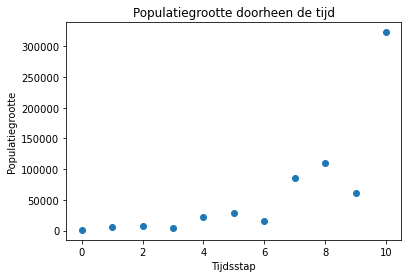

In [30]:
plot_populatiegrootte(L_new, v_0, 10)

Het is ook mogelijk om de functie `stackplot` te gebruiken, waarbij de grafiek weergeeft hoeveel dieren van elke soort (eitjes, larven en kevers) er op elk moment zijn. Wanneer vertrokken wordt van een begintoestand $v_0$ en de Lesliematrix $L$ gebruikt wordt om de populatiegroei te beschrijven, kan dit kan als volgt (details niet te kennen, enkel informatief):

In [31]:
def plot_aantallen_in_levensfases(L, v_0, t):
    '''
    Plot, vertrekkend vanuit de toestand v, het aantal eitjes, larven en kevers
    gedurende t tijdsstappen, waarbij de populatiegroei bepaald wordt door de
    Lesliematrix L
    
    Parameters
    ----------
    L: 2D array
        De Lesliematrix
    v_0: 1D array
        De huidige toestand
    t: int
        Het aantal tijdsstappen
    '''
    
    # bereken de resultaten
    results = v_0.reshape(len(v_0), 1)
    for i in range(t):
        v_t = L @ results[:, -1]
        results = np.append(results, v_t.reshape(len(v_t), 1), 1)
    
    # maak een nieuwe grafiek aan
    plt.figure()
    
    # gebruik de functie stackplot om de som van waarden te bepalen
    plt.stackplot(np.arange(t + 1), results[:3], baseline="zero")
    
    # voeg een legende toe
    plt.legend(["Eitjes", "Larven", "Kevers"], loc="upper left")
    
    # breng verduidelijkende labels aan
    plt.xlabel("Tijdsstap")
    plt.ylabel("Aantal")
    
    # limiteer de x-as tot het interval [0, t]
    ax = plt.gca()
    ax.set_xlim(0, 20)
    
    # voeg een titel toe
    plt.title("Aandeel eitjes, larven en kevers")
    
    # toon de grafiek
    plt.show()

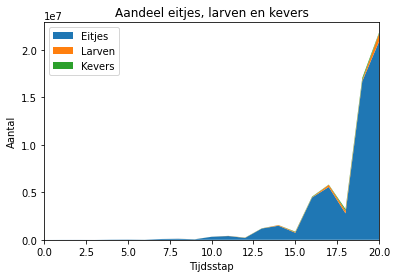

In [32]:
plot_aantallen_in_levensfases(L_new, v_0, 20)

Hier stellen we duidelijk vast dat het grootste deel van de populatie bestaat uit eitjes, en dat er over het algemeen meer larven dan kevers zijn. In het volgende voorbeeld zal het verschil tussen verschillende categorieën minder uitgesproken zijn.

## De insecten voorbij

De Lesliematrix werd in voorgaand voorbeeld uitsluitend gebruikt om een kever van één levensloop naar een andere te doen gaan, waarbij enkel een kever voor reproductie in de vorm van eitjes kon zorgen. Het model kan evenwel ook op andere manieren gebruikt worden. In wat volgt gebruiken we het model om de levensloop van een vrouw in kader te brengen.

We delen allereerst de levensloop van een vrouw in in perioden van tien jaar: van 0 tot 10 jaar, van 10 tot 20 jaar, etc. Vervolgens berekenen we de kans dat een pasgeboren meisje de leeftijd van 10 jaar haalt, dat een meisje van 10 de leeftijd van 20 jaar haalt, dat een vrouw van 20 de leeftijd van 30 haalt, etc. Deze kans gebruiken we als overgangswaarden van de ene toestand naar de volgende, net zoals we dat deden bij de kevers.

Om de kansen te berekenen, baseren we ons op de sterftetafel van 2022 in België, die [hier](https://statbel.fgov.be/sites/default/files/files/documents/bevolking/5.4%20Sterfte%2C%20levensverwachting%20en%20doodsoorzaken/5.4.3%20Sterftetafels%20en%20levensverwachting/sterftetafelsAE.xls) terug te vinden is. Om de kans te berekenen dat een pasgeboren meisje de leeftijd van 10 jaar haalt, volstaat het om het aantal meisjes van 10 jaar te delen door het aantal pasgeboren meisjes: $996227 / 1000000 \approx 0.9962$. Op een gelijkaardige manier kunnen we te werk gaan om de andere kansen te berekenen. Vul op basis van de sterftetafel volgende tabel verder aan:

|  Leeftijd |  Kans  |
|-----------|--------|
|   0 -  10 | 0.9962 |
|  10 -  20 | 0.9989 |
|  20 -  30 | 0.9979 |
|  30 -  40 | 0.9955 |
|  40 -  50 | 0.9889 |
|  50 -  60 | 0.9708 |
|  60 -  70 | 0.9275 |
|  70 -  80 | 0.8189 |
|  80 -  90 | 0.4949 |
|  90 - 100 | 0.0699 |
| 100 - 110 | 0      |

De laatste waarde van 0 is een onderschatting van de werkelijke kans om 110 jaar te worden wanneer de leeftijd van 100 bereikt wordt, maar we gebruiken deze hier bij gebrek aan data.

Naast deze faseovergangen gedurende de levensloop van een vrouw, moeten we ook rekening houden met de geboorte van nieuwe dochters. Hierbij kunnen we uitgaan van volgende fictieve data:

|  Leeftijd | # dochters |
|-----------|------------|
|   0 -  10 | 0          |
|  10 -  20 | 0.05       |
|  20 -  30 | 0.57       |
|  30 -  40 | 0.49       |
|  40 -  50 | 0.04       |
|  50 -  60 | 0          |
|  60 -  70 | 0          |
|  70 -  80 | 0          |
|  80 -  90 | 0          |
|  90 - 100 | 0          |
| 100 - 110 | 0          |

Dit houdt in dat de verwachtingswaarde van het aantal nieuwe dochters van tiener gelijk is aan 0.04, terwijl het verwachte aantal nieuwe dochters van een twintiger gelijk is aan 0.47.

## Opdracht 4

Ontwerp met behulp van de `NumPy` module een Lesliematrix $L$ die bovenstaande gegevens omvat. Maak hierbij gebruik van de functie `zeros`, die het mogelijk maakt om een matrix met enkel nullen aan te maken:

In [33]:
M = np.zeros([4, 6])
print(M)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Gebruik deze functie om een matrix $L$ met enkel nullen aan te maken, en vervolgens de berekende/gegeven waarden in te vullen. We kunen dan de functies die hierboven geprogrammeerd werden opnieuw gebruiken om op basis van een toestand $v_0$ de nieuwe toestand $v_{1}$ tien jaar later te berekenen. We starten vanuit deze toestand:

$$v_0 = [660000, 656000, 650000, 640000, 630000, 610000, 580000, 530000, 500000, 200000, 15000]$$

In [34]:
# Matrix met nullen
L = np.zeros([11, 11])

# Overgang naar ander decennium
L[1, 0] = 0.9962
L[2, 1] = 0.9989
L[3, 2] = 0.9979
L[4, 3] = 0.9955
L[5, 4] = 0.9889
L[6, 5] = 0.9708
L[7, 6] = 0.9275
L[8, 7] = 0.8189
L[9, 8] = 0.4949
L[10, 9] = 0.0699

# Aantal geboortes
L[0, 1] = 0.05
L[0, 2] = 0.57
L[0, 3] = 0.49
L[0, 4] = 0.04

# Print de matrix
print(L)

[[0.     0.05   0.57   0.49   0.04   0.     0.     0.     0.     0.
  0.    ]
 [0.9962 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.9989 0.     0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.9979 0.     0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.9955 0.     0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.9889 0.     0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.9708 0.     0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.9275 0.     0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.8189 0.     0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.4949 0.
  0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.0699
  0.    ]]


De huidige toestand wordt als volgt gedefinieerd:

In [35]:
# Huidige toestand
v_0 = np.array([660000, 656000, 650000, 640000, 630000, 610000, 580000, 530000, 500000, 200000, 15000])

Als je de matrix $L$ juist gedefinieerd hebt, zal je in staat zijn om stap per stap de nieuwe toestand te berekenen. Doen we dit bijvoorbeeld voor $v_{t + 1}$:

In [36]:
v_1 = L @ v_0
print(v_1)

[742100.  657492.  655278.4 648635.  637120.  623007.  592188.  537950.
 434017.  247450.   13980. ]


Net als bij de kevers, kan je ook hier het aandeel van elke categorie plotten doorheen de tijd:

In [37]:
def plot_leeftijden(L, v_0, t):
    '''
    Plot, vertrekkend vanuit de toestand v, het aantal vrouwen in een bepaalde
    leeftijdscategorie gedurendeende t tijdsstappen, waarbij de populatiegroei
    bepaald wordt door de Lesliematrix L
    
    Parameters
    ----------
    L: 2D array
        De Lesliematrix
    v_0: 1D array
        De huidige toestand
    t: int
        Het aantal tijdsstappen
    '''
    
    # bereken de resultaten
    results = v_0.reshape(len(v_0), 1)
    for i in range(t):
        v_t = L @ results[:, -1]
        results = np.append(results, v_t.reshape(len(v_t), 1), 1)
    
    # maak een nieuwe grafiek aan
    plt.figure()
    
    # gebruik de functie stackplot om de som van waarden te bepalen
    plt.stackplot(np.arange(t + 1), results, baseline="zero")
    
    # voeg een legende toe
    plt.legend([f'{10 * i} - {10 * i + 10}' for i in range(11)], loc='upper left',
               bbox_to_anchor=(1, 1))
    
    # breng verduidelijkende labels aan
    plt.xlabel("Tijdsstap")
    plt.ylabel("Aantal")
    
    # limiteer de x-as tot het interval [0, t]
    ax = plt.gca()
    ax.set_xlim(0, t)
    
    # voeg een titel toe
    plt.title('Aandeel leeftijdscategorieën')
    
    # toon de grafiek
    plt.show()

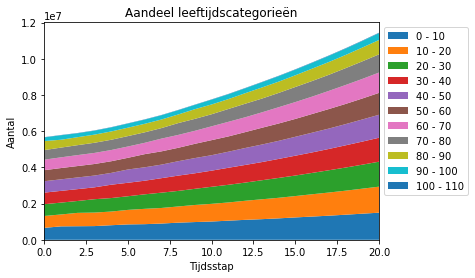

In [38]:
plot_leeftijden(L, v_0, 20)

We zien dat het aantal vrouwen in elke categorie stijgt. Beantwoord nu volgende vraag: wanneer zal het totale aantal pasgeboren meisjes voor het eerst boven de 1 miljoen gaan?

Dit kan je bepalen door stap voor stap de nieuwe toestand te berekenen, en na te gaan hoeveel pasgeboren meisjes er zijn. Print in elke tussenstap uit hoeveel tijdsperioden er gepasseerd zijn, en hoeveel meisjes er dan zijn. Stop met itereren zodra het aantal pasgeboren meisjes groter is dan 1 miljoen. Wat is je antwoord?

In [39]:
v_t = v_0
t = 0
while v_t[0] < 1000000:
    v_t = L @ v_t
    t += 1
    print(f"{t}, {int(v_t[0])}")

1, 742100
2, 749699
3, 757562
4, 805447
5, 850157
6, 863946
7, 897461
8, 947118
9, 980257
10, 1010217
